In [2]:
import pandas as pd
from db_utils import QueryAll

# Wall clock data
data_clocks = QueryAll("clock_uk")

# Harry Potter book data
data_books = QueryAll("book_uk")

cols = ["id", "title", "globalId", "categoryId", "categoryName", "url", "location", "shippingType", "shippingLocations",
                "shippingTime", "startTime", "endTime", "returnsAccepted", "conditionId", "listingIsTopRated", 
                "sellerFeedbackScore", "sellerPositivePercent", "sellerName", "sellerIsTopRated", "price", "currency", "bids"]

clocks = pd.DataFrame(data_clocks, columns=cols)
books = pd.DataFrame(data_books, columns=cols)

df_clocks = clocks[(clocks.bids != -1) & (clocks.bids != -2)].reset_index()
df_books = books[(books.bids != -1) & (books.bids != -2)].reset_index()

In [29]:
df_clocks

,index,id,title,globalId,categoryId,categoryName,url,location,shippingType,shippingLocations,...,returnsAccepted,conditionId,listingIsTopRated,sellerFeedbackScore,sellerPositivePercent,sellerName,sellerIsTopRated,price,currency,bids
0,1,225229693627,retro clock,EBAY-GB,20561,Wall Clocks,https://www.ebay.co.uk/itm/retro-clock-/225229...,"Lewes,United Kingdom",Flat,Worldwide,...,-1,3000,0,255,100.0,uphillonfixed,0,£5.00,-1,0
1,3,265963174354,large oval wall clock Silver And White Face 4...,EBAY-GB,20561,Wall Clocks,https://www.ebay.co.uk/itm/large-oval-wall-clo...,"Staines,United Kingdom",Flat,Worldwide,...,-1,3000,0,1466,100.0,lizzie-drip,0,£10.00,-1,1
2,4,325404594797,Lisa Parker Silver Effect Tree Of Life Wall Cl...,EBAY-GB,20561,Wall Clocks,https://www.ebay.co.uk/itm/Lisa-Parker-Silver-...,"Sunderland,United Kingdom",Flat,Worldwide,...,-1,1000,0,920,100.0,paulasf17,0,£13.99,-1,0
3,5,204136797199,"9"" WOODEN WALL CLOCK BLACK HANDS",EBAY-GB,20561,Wall Clocks,https://www.ebay.co.uk/itm/9-WOODEN-WALL-CLOCK...,"Tenby,United Kingdom",Flat,Worldwide,...,-1,3000,0,2993,100.0,marpow61,0,£4.98,-1,0
4,6,185638233876,Surreal Melting Distorted Clock Creative Salva...,EBAY-GB,20561,Wall Clocks,https://www.ebay.co.uk/itm/Surreal-Melting-Dis...,"Harleston,United Kingdom",Flat,Worldwide,...,-1,3000,0,232,100.0,khun6253,0,£3.20,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2714,165752410069,"Newgate “Echo Number One” Wall Clock, Dia 53cm...",EBAY-GB,20561,Wall Clocks,https://www.ebay.co.uk/itm/Newgate-Echo-Number...,"Derby,United Kingdom",FreePickup,Worldwide,...,-1,1000,0,1353,100.0,sharont01543,0,£45.00,-1,0
489,2724,125589131588,Emma Bridgewater pink hearts clock (needs new ...,EBAY-GB,262393,Clocks,https://www.ebay.co.uk/itm/Emma-Bridgewater-pi...,"Hope Valley,United Kingdom",Free,Worldwide,...,-1,7000,0,479,100.0,jennyblue222,0,£23.00,-1,4
490,2729,275523415574,Premier 240 LED Snowing Icicles Multi-Action X...,EBAY-GB,38229,String Lights,https://www.ebay.co.uk/itm/Premier-240-LED-Sno...,"Bradford,United Kingdom",Flat,Worldwide,...,-1,1000,0,740,100.0,2013star14,0,£25.99,-1,0
491,2993,394312524769,Vintage Retro 1970 Metamic Wall Clock,EBAY-GB,261608,Wall Clocks,https://www.ebay.co.uk/itm/Vintage-Retro-1970-...,"Alfreton,United Kingdom",Flat,Worldwide,...,-1,3000,0,1775,100.0,bronski000,0,£20.99,-1,0


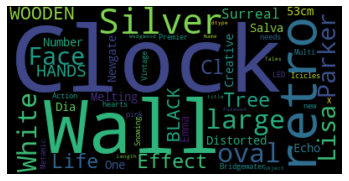

In [9]:

!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
# Start with one review:
text = str(df_clocks["title"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


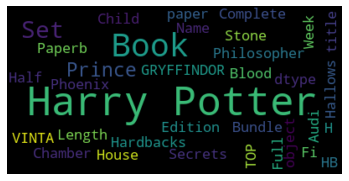

In [28]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
# Start with one review:
text = str(df_books["title"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


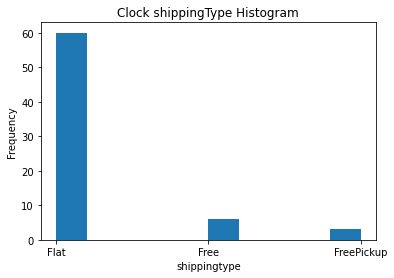

In [30]:
#clock shipping type visualization
df_clocks = df_clocks.loc[df_clocks['bids'] != 0]

plt.hist(df_clocks['shippingType'])

plt.title('Clock shippingType Histogram')
plt.xlabel('shippingtype')
plt.ylabel('Frequency')

plt.show()

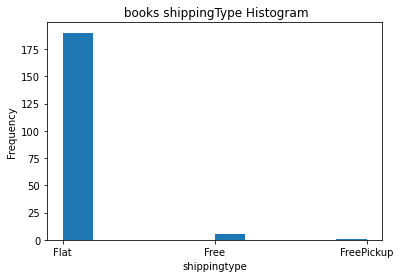

In [31]:
#books shipping type visualization

plt.hist(df_books['shippingType'])

plt.title(' books shippingType Histogram')
plt.xlabel('shippingtype')
plt.ylabel('Frequency')

plt.show()

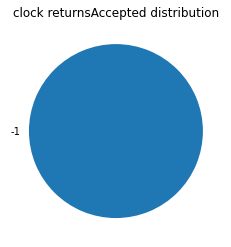

In [35]:
#clock returnsAccepted visualization
clock_label = df_clocks['returnsAccepted'].unique()
clock_size = df_clocks['returnsAccepted'].value_counts().tolist()

plt.title('clock returnsAccepted distribution')

plt.pie(clock_size, labels = clock_label)
plt.show()


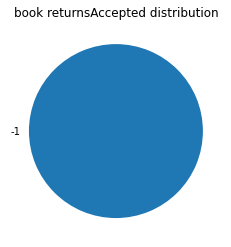

In [37]:
#books returnsAccepted visualization
books_label = df_books['returnsAccepted'].unique()
books_size = df_books['returnsAccepted'].value_counts().tolist()

plt.title('book returnsAccepted distribution')

plt.pie(books_size, labels = books_label)
plt.show()
